# Caratterizzazione delle features scartate con Bonferroni

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

In [2]:
home_path = os.path.abspath(os.getcwd())
home_path

'c:\\Users\\User\\OneDrive\\Documenti\\Uni_nuovo\\Necst\\NL2project\\FDAxEEG\\Dataset'

In [6]:
df = pd.read_csv(home_path+'\df_complete.csv', sep = ',')
df_bonf = pd.read_csv(home_path+'\Bonf_df_complete.csv', sep = ',')

# print(df.columns)
# print(df_bonf.columns)

Index(['int_z1_b0', 'int_z1_b1', 'int_z1_b2', 'int_z1_b3', 'int_z3_b4',
       'int_z4_b4', 'int_z5_b4', 'int_z6_b0', 'int_z6_b1', 'int_z6_b2',
       'int_z1_b3.1', 'norm_z0_b3', 'norm_z1_b0', 'norm_z1_b1', 'norm_z1_b2',
       'norm_z1_b3', 'norm_z3_b4', 'norm_z4_b0', 'norm_z4_b4', 'norm_z6_b0',
       'norm_z6_b1', 'norm_z6_b2', 'norm_z6_b3', 'pic_z0_b3', 'pic_z1_b2',
       'pic_z1_b3', 'pic_z3_b4', 'pic_z4_b4', 'pic_z5_b4', 'pic_z6_b0',
       'pic_z6_b1', 'pic_z6_b2', 'pic_z6_b3'],
      dtype='object')
Index(['int_z1_b2', 'int_z1_b3', 'int_z6_b0', 'int_z6_b1', 'norm_z1_b0',
       'norm_z1_b2', 'norm_z1_b3', 'norm_z6_b0', 'norm_z6_b1', 'max_z1_b2',
       'max_z1_b3', 'max_z3_b4', 'max_z6_b0', 'max_z6_b1'],
      dtype='object')


In [9]:
not_cons = list(set(df.columns) - set(df_bonf.columns))
not_cons

['norm_z6_b3',
 'int_z1_b3.1',
 'norm_z0_b3',
 'pic_z1_b2',
 'int_z4_b4',
 'pic_z6_b2',
 'int_z1_b0',
 'norm_z4_b0',
 'pic_z6_b1',
 'pic_z6_b3',
 'int_z5_b4',
 'pic_z4_b4',
 'norm_z3_b4',
 'int_z1_b1',
 'int_z6_b2',
 'pic_z3_b4',
 'pic_z5_b4',
 'pic_z0_b3',
 'pic_z1_b3',
 'norm_z4_b4',
 'norm_z6_b2',
 'pic_z6_b0',
 'norm_z1_b1',
 'int_z3_b4']

In [12]:
df_not_cons = df[not_cons]
df_not_cons.head()

,norm_z6_b3,int_z1_b3.1,norm_z0_b3,pic_z1_b2,int_z4_b4,pic_z6_b2,int_z1_b0,norm_z4_b0,pic_z6_b1,pic_z6_b3,...,int_z6_b2,pic_z3_b4,pic_z5_b4,pic_z0_b3,pic_z1_b3,norm_z4_b4,norm_z6_b2,pic_z6_b0,norm_z1_b1,int_z3_b4
0,1268.352539,1687.893977,1268.930350,368.676758,7350.304875,309.610992,21.968998,28.864014,58.981052,882.263916,...,751.636155,5884.943848,18736.572266,818.055908,1262.890259,9178.462193,583.792664,11.715752,256.383101,6377.752911
1,1070.819702,1464.723726,850.655046,254.854523,3375.189621,423.909363,20.174632,29.491999,84.580544,702.180603,...,1060.458811,3458.279297,10127.041016,497.234131,697.317871,4685.681572,788.716553,14.928400,183.418781,3668.469256
2,1043.960693,1369.547837,807.889919,292.136841,1707.388859,348.549347,18.676125,29.284583,80.464485,674.208740,...,918.530408,2358.657715,3500.131104,426.164581,599.598999,2608.667161,683.655212,8.690989,169.618629,2429.409135
3,1218.917603,1630.100557,882.091209,300.478455,1205.401089,423.814484,27.023251,35.897903,80.033195,806.424622,...,1103.128694,2198.085449,1274.186890,579.769653,610.236328,1736.522797,863.855042,11.514561,189.080935,2525.060220
4,1183.559326,1589.330132,756.648921,342.757507,1706.316409,521.064697,38.532633,47.021980,65.653732,721.823975,...,1339.031987,3440.830078,1430.056519,396.156830,585.753784,2679.834904,965.850525,16.043320,227.563180,3631.285934


In [13]:
df_not_cons.describe()

,norm_z6_b3,int_z1_b3.1,norm_z0_b3,pic_z1_b2,int_z4_b4,pic_z6_b2,int_z1_b0,norm_z4_b0,pic_z6_b1,pic_z6_b3,...,int_z6_b2,pic_z3_b4,pic_z5_b4,pic_z0_b3,pic_z1_b3,norm_z4_b4,norm_z6_b2,pic_z6_b0,norm_z1_b1,int_z3_b4
count,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,...,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000
mean,673.482329,890.273469,833.994024,293.903519,2863.396902,195.755393,45.671426,110.919254,57.089302,429.372907,...,497.808078,2150.790801,1726.290554,530.226498,827.243203,3677.606382,406.549133,14.542753,284.111305,2814.746318
std,470.941308,614.986601,697.903699,199.287048,6947.046164,224.620389,47.689597,74.870210,61.358527,309.945385,...,499.612770,7055.684559,8547.506427,456.659276,508.503254,7185.850497,352.545407,17.901093,241.042362,7510.830441
min,28.426512,36.815788,100.454725,45.807602,367.202428,11.801332,8.540155,9.789676,3.719572,16.953024,...,34.763486,220.923737,37.098198,60.421799,166.970505,426.247266,28.204096,0.733928,49.907765,376.196674
25%,342.153114,452.559460,378.663242,156.224266,1372.547392,72.801697,24.522390,60.930679,21.915535,207.660099,...,206.213935,771.995499,454.027718,228.980831,444.293869,1792.877561,179.881950,5.555747,165.501226,1256.695178
50%,574.474640,767.987360,689.577870,250.230995,1996.512943,139.532639,34.178664,91.162247,39.193304,363.867294,...,383.186550,1261.787354,805.467529,430.347870,718.150482,2631.978995,328.491028,9.748687,238.832926,1925.867746
75%,898.980759,1193.335077,1054.253974,369.173363,2874.936191,235.354965,50.279854,134.173357,67.510569,565.484451,...,613.694254,1937.094849,1459.240479,665.521942,1089.091614,3908.594383,520.980835,16.352236,314.747805,2685.629503
max,3188.350342,4203.367763,6235.120561,1615.053467,182275.885126,1968.974487,555.779037,545.054520,467.562347,2223.750244,...,5022.651752,183763.468750,224810.500000,3752.959229,3866.018799,174769.175054,3757.467773,185.035690,2358.215916,198407.181416


In [15]:
# creating the vector of the labels
y = np.append(np.ones((555, 1), dtype=int),np.zeros((427, 1), dtype=int))

df_not_cons = pd.concat([df_not_cons,pd.DataFrame({'y': y})], axis=1)
# df_log_label['y'] = pd.Categorical(df_log_label['y'])

df_not_cons['y'] = df_not_cons.y.astype('category')

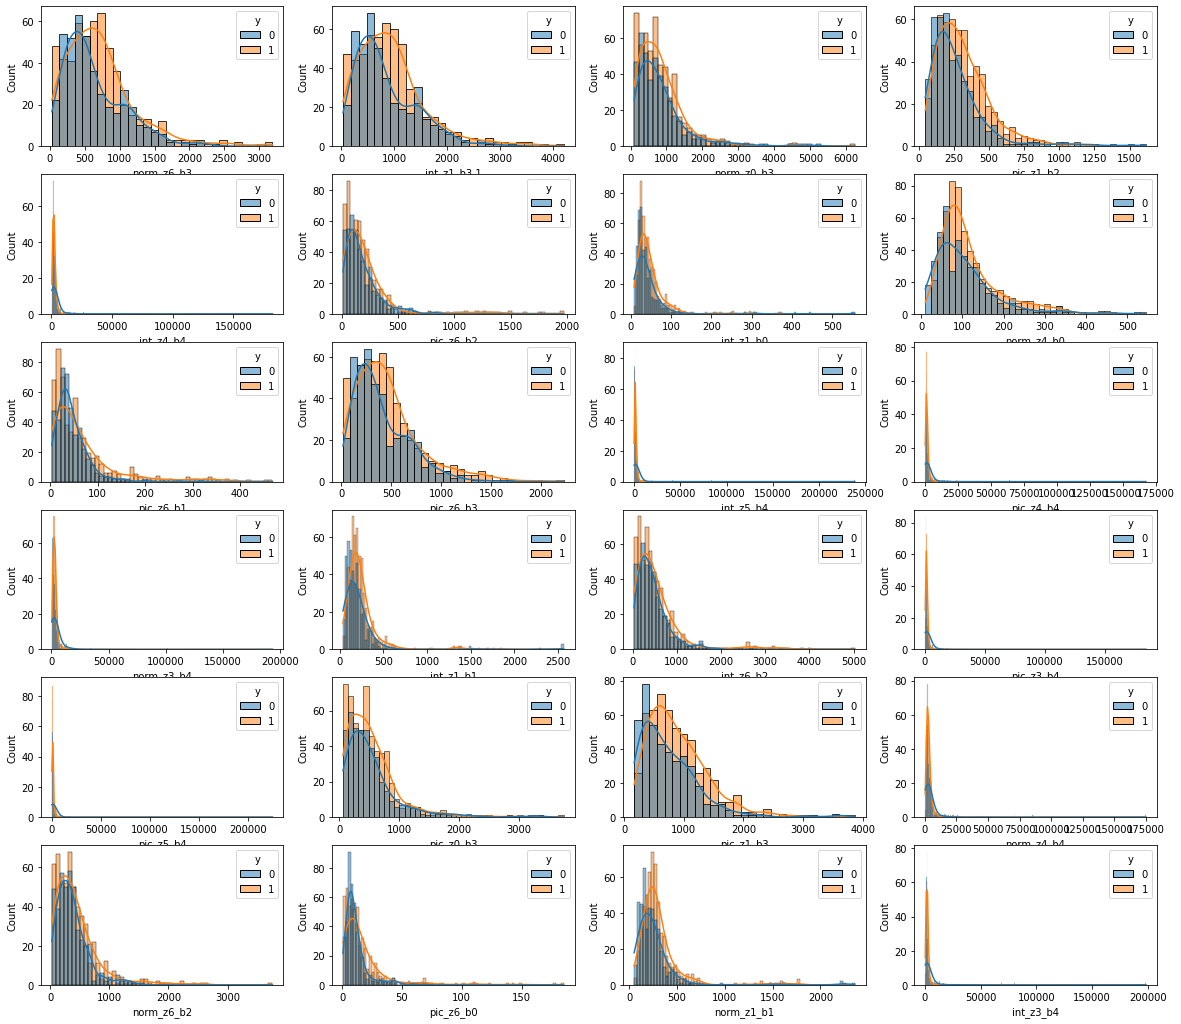

In [30]:
colnames = df_not_cons.columns

fig, axs = plt.subplots(6, 4, figsize=(20, 18))

for i in range(df_not_cons.shape[1]-1):
    sns.histplot(df_not_cons, x = colnames[i], kde = True, hue = 'y', ax = axs[i//4, i%4])

# sistema il modo per vedere i labels

Working on Bonferroni's features

In [31]:
df_bonf = pd.concat([df_bonf,pd.DataFrame({'y': y})], axis=1)
# df_log_label['y'] = pd.Categorical(df_log_label['y'])

df_bonf['y'] = df_bonf.y.astype('category')

In [32]:
df_bonf.shape

(982, 15)

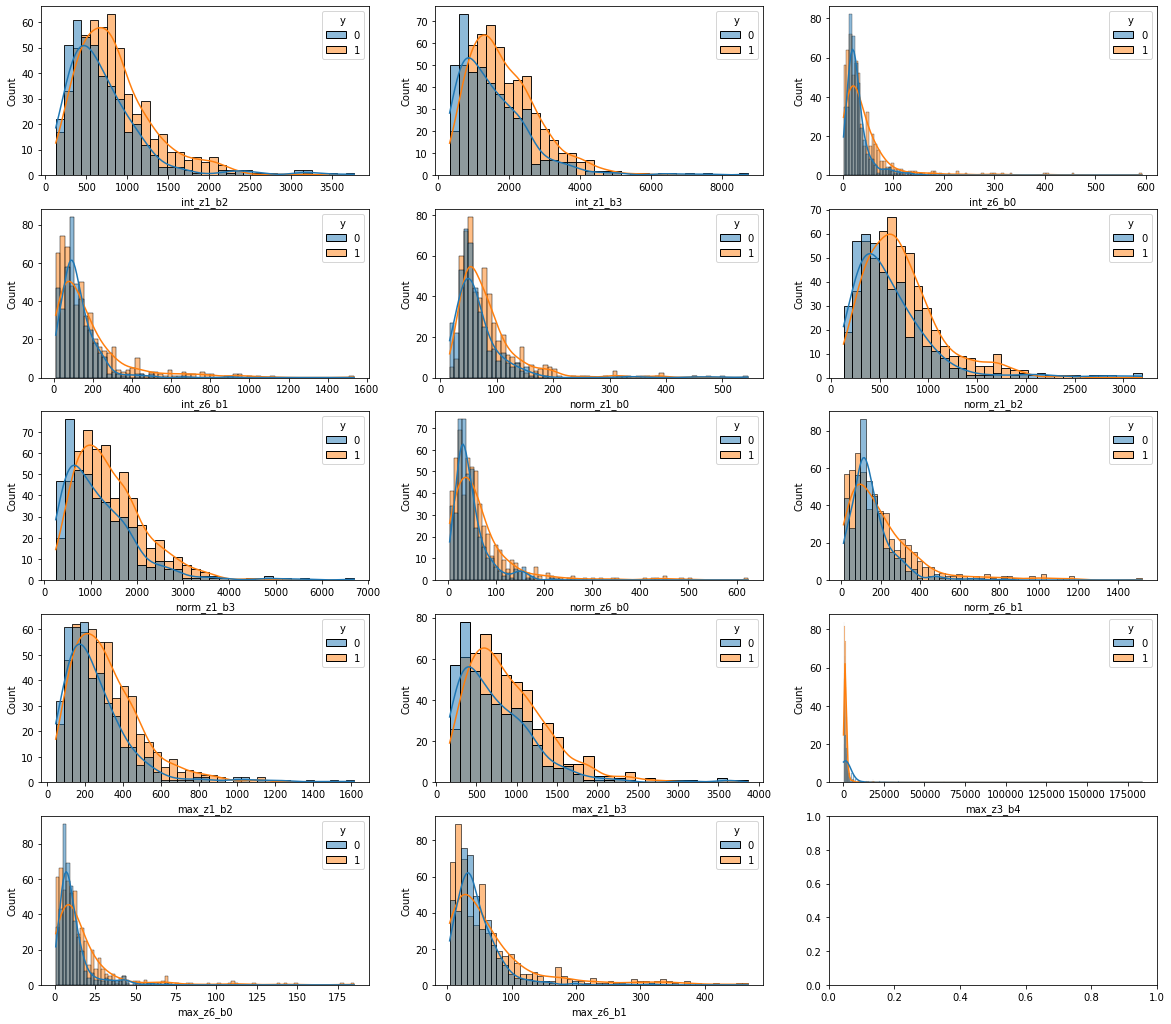

In [34]:
colnames = df_bonf.columns

fig, axs = plt.subplots(5, 3, figsize=(20, 18))

for i in range(df_bonf.shape[1]-1):
    sns.histplot(df_bonf, x = colnames[i], kde = True, hue = 'y', ax = axs[i//3, i%3])